# Building a NLP Model from Yelp Reviews

**The purpose of this project is to determine if people leaving a review on social media have a positive or negative experience with the associated business**

## Set-up

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [175]:
# Importing the files, sourced from kaggle.

In [176]:
df = pd.read_csv('Z:\Learning and Development\Data Science\Projects\Yelp Review NLP\yelp.csv')

In [177]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [179]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [180]:
# To determine if the review is positive or negative im going to split the review by their ratings. x >= 3 is positive. 

**0 is negative and 1 is positive.**

In [181]:
df['stars'] = df['stars'].apply(lambda x: 0 if x < 3 else 1)

In [182]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,1,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,1,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,1,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,1,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [183]:
# How many different types of 'type' are there?

In [184]:
df['type'].nunique()

1

In [185]:
# Creating a df with just the stars and text.
# Change stars column title to 'outlook'

In [186]:
df_yelp = df[['stars','text']]
df_yelp.columns = ['outlook','text']

In [187]:
df_yelp.head()

,outlook,text
0,1,My wife took me here on my birthday for breakf...
1,1,I have no idea why some people give bad review...
2,1,love the gyro plate. Rice is so good and I als...
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1,General Manager Scott Petello is a good egg!!!...


## EDA

In [188]:
# add a column for the length of text, perhaps theres a correlation between good reviews and text length?

In [189]:
df_yelp['text length'] = df_yelp['text'].apply(len)

In [190]:
df_yelp.head()

,outlook,text,text length
0,1,My wife took me here on my birthday for breakf...,889
1,1,I have no idea why some people give bad review...,1345
2,1,love the gyro plate. Rice is so good and I als...,76
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,1,General Manager Scott Petello is a good egg!!!...,469


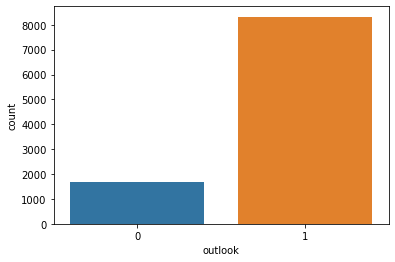

In [191]:
sns.countplot(x='outlook',data=df_yelp)

In [192]:
# There are far more positive reviews than negitive ones. Could create strong bias in training for positive reviews.

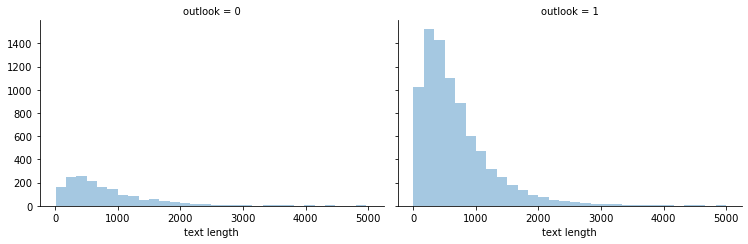

In [193]:
g = sns.FacetGrid(df_yelp, col="outlook", height=3.5, aspect=1.5)
g.map(sns.distplot, "text length", kde=False, bins = 30)

In [194]:
# the plots show that both have similar distributions with the mode around 300 words per review.

In [195]:
# Plot word clouds for negative and positive reviews

In [196]:
from wordcloud import WordCloud

In [197]:
positive = df_yelp[df_yelp['outlook'] == 1]['text']
negative = df_yelp[df_yelp['outlook'] == 0]['text']

text_pos = ''.join(i for i in positive)
text_neg = ''.join(i for i in negative)

In [198]:
# Plot a word cloud of all the positive reviews.

(-0.5, 399.5, 199.5, -0.5)

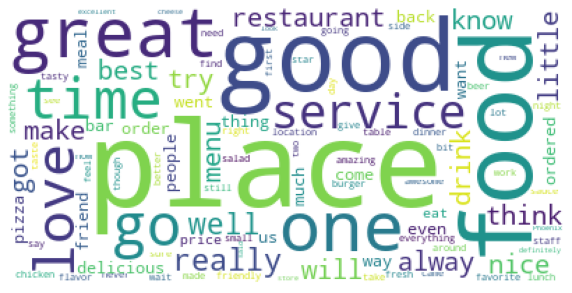

In [199]:
WC_pos = WordCloud(background_color='white', max_words=100)
WC_pos.generate(text_pos)

plt.figure(figsize=(10,10))
plt.imshow(WC_pos)
plt.axis('off')

In [200]:
# Plot a word cloud of all the negative reviews.

(-0.5, 399.5, 199.5, -0.5)

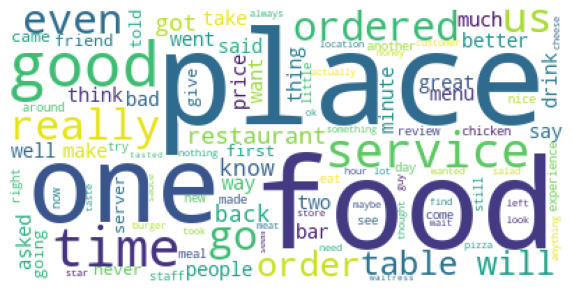

In [201]:
WC_neg = WordCloud(background_color='white', max_words=100)
WC_neg.generate(text_neg)

plt.figure(figsize=(10,10))
plt.imshow(WC_neg)
plt.axis('off')

## Machine Learning Section

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [203]:
X = df_yelp['text']
y = df_yelp['outlook']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

### Naive Bayes 

In [204]:
pipeline_NB = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [205]:
pipeline_NB.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [206]:
pred_NB = pipeline_NB.predict(X_test)

In [207]:
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 226  297]
 [  85 2392]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       523
           1       0.89      0.97      0.93      2477

    accuracy                           0.87      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.86      0.87      0.86      3000



 **87% accurate, not bad. However, the accuracy of the negative reviews (54%) is not great, this could be because of the bais in the classes seen above.**

In [209]:
# test a random review

In [210]:
test = ['Terrible, absolutely terrible...']
print(pipeline_NB.predict(test))

[0]


In [211]:
# good, the multinomical naive bayes predicted the review.

### Text Pre-Processing

In [212]:
# remove all the stop words and punctuation.

In [213]:
import string
from nltk.corpus import stopwords

In [214]:
# create a function that removes punctuation and removes stop words.

In [215]:
def clean_text(text):
    # remove punctuation
    text = [i for i in text if i not in string.punctuation]
    # rejoin string
    text = ''.join(text)
    # remove stop words and return cleaned string
    return [i for i in text.split() if i.lower() not in stopwords.words('english')]

In [216]:
# apply the cleaner to the bow vectorizer

In [217]:
pipeline_NB_clean = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('classifier', MultinomialNB())
])

In [218]:
# test the same ML model as above

In [219]:
pipeline_NB_clean.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x000001EE208419D0>)),
                ('classifier', MultinomialNB())])

In [220]:
pred_NB_clean = pipeline_NB_clean.predict(X_test)

In [221]:
print(confusion_matrix(y_test, pred_NB_clean))
print(classification_report(y_test, pred_NB_clean))

[[ 174  349]
 [  38 2439]]
              precision    recall  f1-score   support

           0       0.82      0.33      0.47       523
           1       0.87      0.98      0.93      2477

    accuracy                           0.87      3000
   macro avg       0.85      0.66      0.70      3000
weighted avg       0.87      0.87      0.85      3000



**The overall accuracy is the same for both iterations, however, the negative review accuracy has decreased by 7%**

## Balancing Test Classes with SMOTE

I will now use SMOTE to create an even amount of negative and positive reviews in the original df. I'm using this method to try and improve the accuracy of predictions of negitive reviews as these currently have a poor accuracy.

Instead of making duplicates of existing negative reviews SMOTE will synthesize new examples from the minority class.

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
# need to vectorize the training data and apply tf-idf to get a weighting of meaningful words.

In [224]:
Vec = CountVectorizer().fit(X_train)

X_trainV = Vec.transform(X_train)
X_testV = Vec.transform(X_test)

sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_trainV, y_train)

In [225]:
# Test the smote test data on the original ML to compare results.

In [226]:
NB = MultinomialNB()
NB.fit(X_bal, y_bal)

MultinomialNB()

In [227]:
pred_NB = NB.predict(X_testV)

In [228]:
from sklearn.metrics import confusion_matrix, classification_report

In [229]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 220  303]
 [  98 2379]]
              precision    recall  f1-score   support

           0       0.69      0.42      0.52       523
           1       0.89      0.96      0.92      2477

    accuracy                           0.87      3000
   macro avg       0.79      0.69      0.72      3000
weighted avg       0.85      0.87      0.85      3000



**The over all accuracy is the same, but with a 1% decrease in positive messages and a 5% increase in negative review accuracy. Going forwards i will use SMOTE**

## SMOTE with Text Pre-Processing

In [239]:
Vec = CountVectorizer(clean_text).fit(X_train)

X_trainV = Vec.transform(X_train)
X_testV = Vec.transform(X_test)

sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_trainV, y_train)

In [240]:
NB = MultinomialNB()
NB.fit(X_bal, y_bal)

MultinomialNB()

In [241]:
pred_NB = NB.predict(X_testV)

In [242]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 220  303]
 [  98 2379]]
              precision    recall  f1-score   support

           0       0.69      0.42      0.52       523
           1       0.89      0.96      0.92      2477

    accuracy                           0.87      3000
   macro avg       0.79      0.69      0.72      3000
weighted avg       0.85      0.87      0.85      3000



**No change when using Text processing so i will not use it going forwards as it will only slow down runtime.**

## Try SMOTE with a TF-IDF Vectorizer

**I want to see if adding a weighting to the frequency of the words will help the ML algorithm need to vectorize the training data and apply tf-idf to get a weighting of meaningful words.**

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [254]:
Vec = TfidfVectorizer().fit(X_train)

X_trainV = Vec.transform(X_train)
X_testV = Vec.transform(X_test)

sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_trainV, y_train)

In [255]:
NB = MultinomialNB()
NB.fit(X_bal, y_bal)

MultinomialNB()

In [256]:
pred_NB = NB.predict(X_testV)

In [257]:
print(confusion_matrix(y_test,pred_NB))
print(classification_report(y_test,pred_NB))

[[ 426   97]
 [ 478 1999]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.60       523
           1       0.95      0.81      0.87      2477

    accuracy                           0.81      3000
   macro avg       0.71      0.81      0.74      3000
weighted avg       0.87      0.81      0.83      3000



**Using TF-IDF increased the performance of the model. Going forwards i will use TF-IDF**

## Try a logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lm = LogisticRegression(max_iter=10000)

In [138]:
lm.fit(X_bal, y_bal)

LogisticRegression(max_iter=10000)

In [139]:
pred_lm = lm.predict(X_testV)

In [140]:
print(confusion_matrix(y_test,pred_lm))
print(classification_report(y_test,pred_lm))

[[ 357  166]
 [ 208 2269]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       523
           1       0.93      0.92      0.92      2477

    accuracy                           0.88      3000
   macro avg       0.78      0.80      0.79      3000
weighted avg       0.88      0.88      0.88      3000



### Perform Iterations to find optimal value of C

In [162]:
# This code loops through values of C and then calculated the error between the predicted value and the actual value.

In [149]:
error = []
lis = np.arange(1,50,1)

for i in lis:
    lm = LogisticRegression(C= i, max_iter=10000)
    lm.fit(X_bal, y_bal)
    pred_lm = lm.predict(X_testV)
    error.append(np.mean(pred_lm != y_test))

Text(0, 0.5, 'Error Rate')

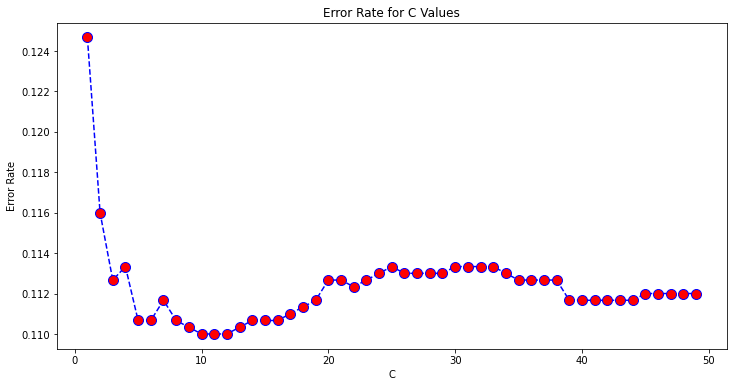

In [150]:
plt.figure(figsize=(12,6))
plt.plot(lis,error,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('Error Rate for C Values')
plt.xlabel('C')
plt.ylabel('Error Rate')

In [84]:
# Note how this shows overall error is at a max when C = 10-12
# I dont have a way to track how C effects the negitive reviews, only the overall accuracy of the model.

In [85]:
# error in negative reviews is found from comparing 0 - 0, 0 - 1 in our predicted to actual.

In [293]:
percent_correct_0 = []
pred_0 = []
y_test_0 = []
lis_0 = np.arange(1,50,1)

# loops through possible values of C in the logistic regression.
for i in lis_0:
    lm = LogisticRegression(C= i, max_iter=10000)
    lm.fit(X_bal, y_bal)
    pred_lm = lm.predict(X_testV)
    
    # creates a list of only the negitively predicted reviews and a list of the actual reviews.
    for i_idx, i in enumerate(pred_lm):
        if pred_lm[i_idx] == 0:
            pred_0.append(pred_lm[i_idx])
            y_test_0.append(list(y_test)[i_idx])
            
    correct = 0
    
    # compares these two lists and returns the precision of negatively predicted messages.
    for j_idx, j in enumerate(pred_0):
        if pred_0[j_idx] == y_test_0[j_idx]:
            correct += 1
    
    percent_correct_0.append(correct/j_idx)

Text(0, 0.5, '% Precision')

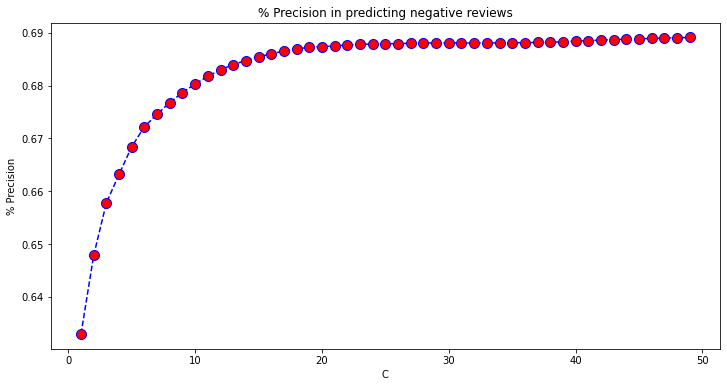

In [294]:
plt.figure(figsize=(12,6))
plt.plot(lis_0,percent_correct_0,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('% Precision in predicting negative reviews')
plt.xlabel('C')
plt.ylabel('% Precision')

In [144]:
# interestingly when increasing the value of C the accuracy of predicting
# negative reviews increase to an asymtopic value around 69%.

**I will use a logistic regression with a C value of 12. This value of 12 gives a minimum over all error and takes advatage of the majority of the  % precision increase with C for the negative reviews.**

In [164]:
lm = LogisticRegression(C= 12, max_iter=10000)
lm.fit(X_bal, y_bal)
pred_lm = lm.predict(X_testV)
print(confusion_matrix(y_test,pred_lm))
print(classification_report(y_test,pred_lm))

[[ 341  182]
 [ 148 2329]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       523
           1       0.93      0.94      0.93      2477

    accuracy                           0.89      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.89      0.89      0.89      3000



In [165]:
# Choosing the optimal value of C increase the negative and positive review accuracy by 1%

## Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
RF = RandomForestClassifier(n_estimators=100)

In [260]:
RF.fit(X_bal, y_bal)

RandomForestClassifier()

In [261]:
pred_RF = RF.predict(X_testV)

In [286]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))

[[  86  437]
 [  69 2408]]
              precision    recall  f1-score   support

           0       0.55      0.16      0.25       523
           1       0.85      0.97      0.90      2477

    accuracy                           0.83      3000
   macro avg       0.70      0.57      0.58      3000
weighted avg       0.80      0.83      0.79      3000



**Not better than the un-optimised Logistic Regression. Accuracy of the negative reviews is very poor.**

In [ ]:
# Try find the optimum number of trees for the RF

In [279]:
error = []
lis = np.arange(100,1000,100)

for i in lis:
    RF = RandomForestClassifier(n_estimators=i)
    RF.fit(X_bal, y_bal)
    pred_RF = RF.predict(X_testV)
    error.append(np.mean(pred_RF != y_test))

Text(0, 0.5, 'Error Rate')

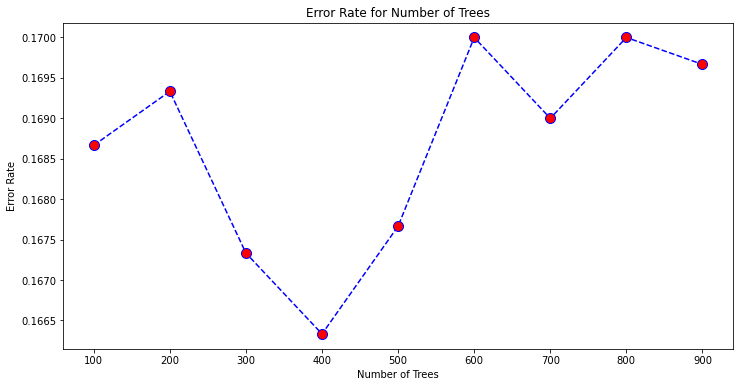

In [296]:
plt.figure(figsize=(12,6))
plt.plot(lis,error,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('Error Rate for Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')

In [297]:
# Note how this shows overall error is at a min when n = 400

In [298]:
# error in negative reviews is found from comparing 0 - 0, 0 - 1 in our predicted to actual.

In [300]:
percent_correct_0 = []
pred_0 = []
y_test_0 = []
lis_0 = np.arange(100,1000,100)

# loops through possible values of C in the logistic regression.
for i in lis_0:
    RF = RandomForestClassifier(n_estimators=i)
    RF.fit(X_bal, y_bal)
    pred_RF = RF.predict(X_testV)
    
    # creates a list of only the negitively predicted reviews and a list of the actual reviews.
    for i_idx, i in enumerate(pred_RF):
        if pred_RF[i_idx] == 0:
            pred_0.append(pred_RF[i_idx])
            y_test_0.append(list(y_test)[i_idx])
            
    correct = 0
    
    # compares these two lists and returns the accuracy of negatively predicted messages.
    for j_idx, j in enumerate(pred_0):
        if pred_0[j_idx] == y_test_0[j_idx]:
            correct += 1
    
    percent_correct_0.append(correct/j_idx)

Text(0, 0.5, '% precision')

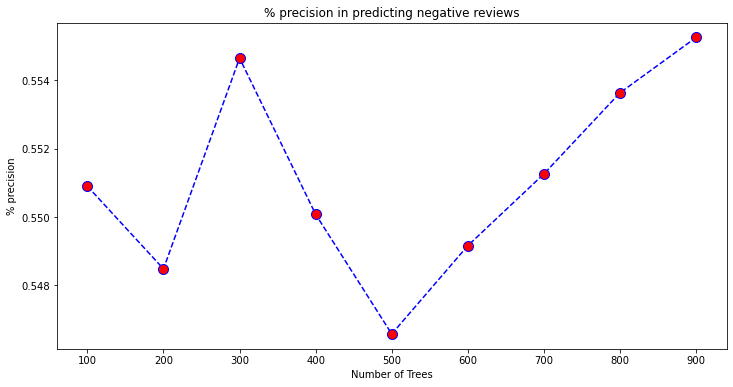

In [301]:
plt.figure(figsize=(12,6))
plt.plot(lis_0,percent_correct_0,color='blue',marker='o',linestyle='dashed',markerfacecolor ='red', markersize=10)
plt.title('% precision in predicting negative reviews')
plt.xlabel('Number of Trees')
plt.ylabel('% precision')

In [302]:
RF_grid = RandomForestClassifier(criterion='entropy', n_estimators=300)

In [303]:
RF_grid.fit(X_bal, y_bal)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [304]:
pred_RF_400 = RF_grid.predict(X_testV)

In [305]:
print(confusion_matrix(y_test,pred_RF_400))
print(classification_report(y_test,pred_RF_400))

[[  80  443]
 [  59 2418]]
              precision    recall  f1-score   support

           0       0.58      0.15      0.24       523
           1       0.85      0.98      0.91      2477

    accuracy                           0.83      3000
   macro avg       0.71      0.56      0.57      3000
weighted avg       0.80      0.83      0.79      3000



**Over all the performance of the Random Forest was not as good as the Logistic Regression**

## Testing - Using the Optimised Logistic Regression

In [162]:
my_review_0 = ['What a lovely place to eat, the only problem was the long waiting time. Would not recommend!']
my_review_0 = Vec.transform(my_review_0)
print(lm.predict(my_review_0))

[0]


In [161]:
# correct!

In [164]:
my_review_1 = ['The food was incredible, the staff responsive and friendly']
my_review_1 = Vec.transform(my_review_1)
print(lm.predict(my_review_1))

[1]


In [165]:
# correct!

In [166]:
my_review_2 = ['Used to be good, but prices are getting quite high and service consistently poor in the shop. Restaurant food is good, but low rent environment. White garden plastic tables and chairs all around.']
my_review_2 = Vec.transform(my_review_2)
print(lm.predict(my_review_2))

[0]


In [167]:
# correct!

In [180]:
my_review_3 = ['Great visit, the food was really good, especially the korean chicken. wish they excepted cash though, getting money out was a bit of a pain']
my_review_3 = Vec.transform(my_review_3)
print(lm.predict(my_review_3))

[1]


In [179]:
# correct!